In [34]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
# Baca dataset (ganti path jika diperlukan)
data = '/content/WineQT.csv'
df = pd.read_csv(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


# **Statistika Deskriptif + Visualisasi**

In [37]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [38]:
# Drop kolom 'Id' karena bukan variabel prediktor
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [39]:
import pandas as pd

# Buat distribusi frekuensi untuk variabel 'quality'
frekuensi = df['quality'].value_counts().sort_index()  # Menghitung jumlah masing-masing kategori dan mengurutkan
persentase = (frekuensi / len(df)) * 100  # Menghitung persentase setiap kategori

# Buat tabel distribusi frekuensi
tabel_frekuensi = pd.DataFrame({
    'Kualitas': frekuensi.index,
    'Frekuensi': frekuensi.values,
    'Persentase (%)': persentase.values
})

# Tampilkan tabel distribusi frekuensi
tabel_frekuensi


,Kualitas,Frekuensi,Persentase (%)
0,3,6,0.524934
1,4,33,2.887139
2,5,483,42.257218
3,6,462,40.419948
4,7,143,12.510936
5,8,16,1.399825


In [40]:
import pandas as pd

# Pilih variabel independen (kecuali kolom 'quality' jika ini variabel dependen)
indep_vars = df.drop(columns=['quality'])  # Jika quality adalah variabel dependen

# Hitung ukuran-ukuran statistika deskriptif
statistika_deskriptif = indep_vars.describe().loc[['mean', '50%', 'std', 'min', 'max']]

# Ubah nama indeks agar lebih mudah dipahami
statistika_deskriptif.rename(index={'50%': 'median'}, inplace=True)

# Tampilkan tabel statistika deskriptif
print(statistika_deskriptif)


        fixed acidity  volatile acidity  citric acid  residual sugar  \
mean         8.311111          0.531339     0.268364        2.532152   
median       7.900000          0.520000     0.250000        2.200000   
std          1.747595          0.179633     0.196686        1.355917   
min          4.600000          0.120000     0.000000        0.900000   
max         15.900000          1.580000     1.000000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide   density  \
mean     0.086933            15.615486             45.914698  0.996730   
median   0.079000            13.000000             37.000000  0.996680   
std      0.047267            10.250486             32.782130  0.001925   
min      0.012000             1.000000              6.000000  0.990070   
max      0.611000            68.000000            289.000000  1.003690   

              pH  sulphates    alcohol  
mean    3.311015   0.657708  10.442111  
median  3.310000   0.620000  10.200000  

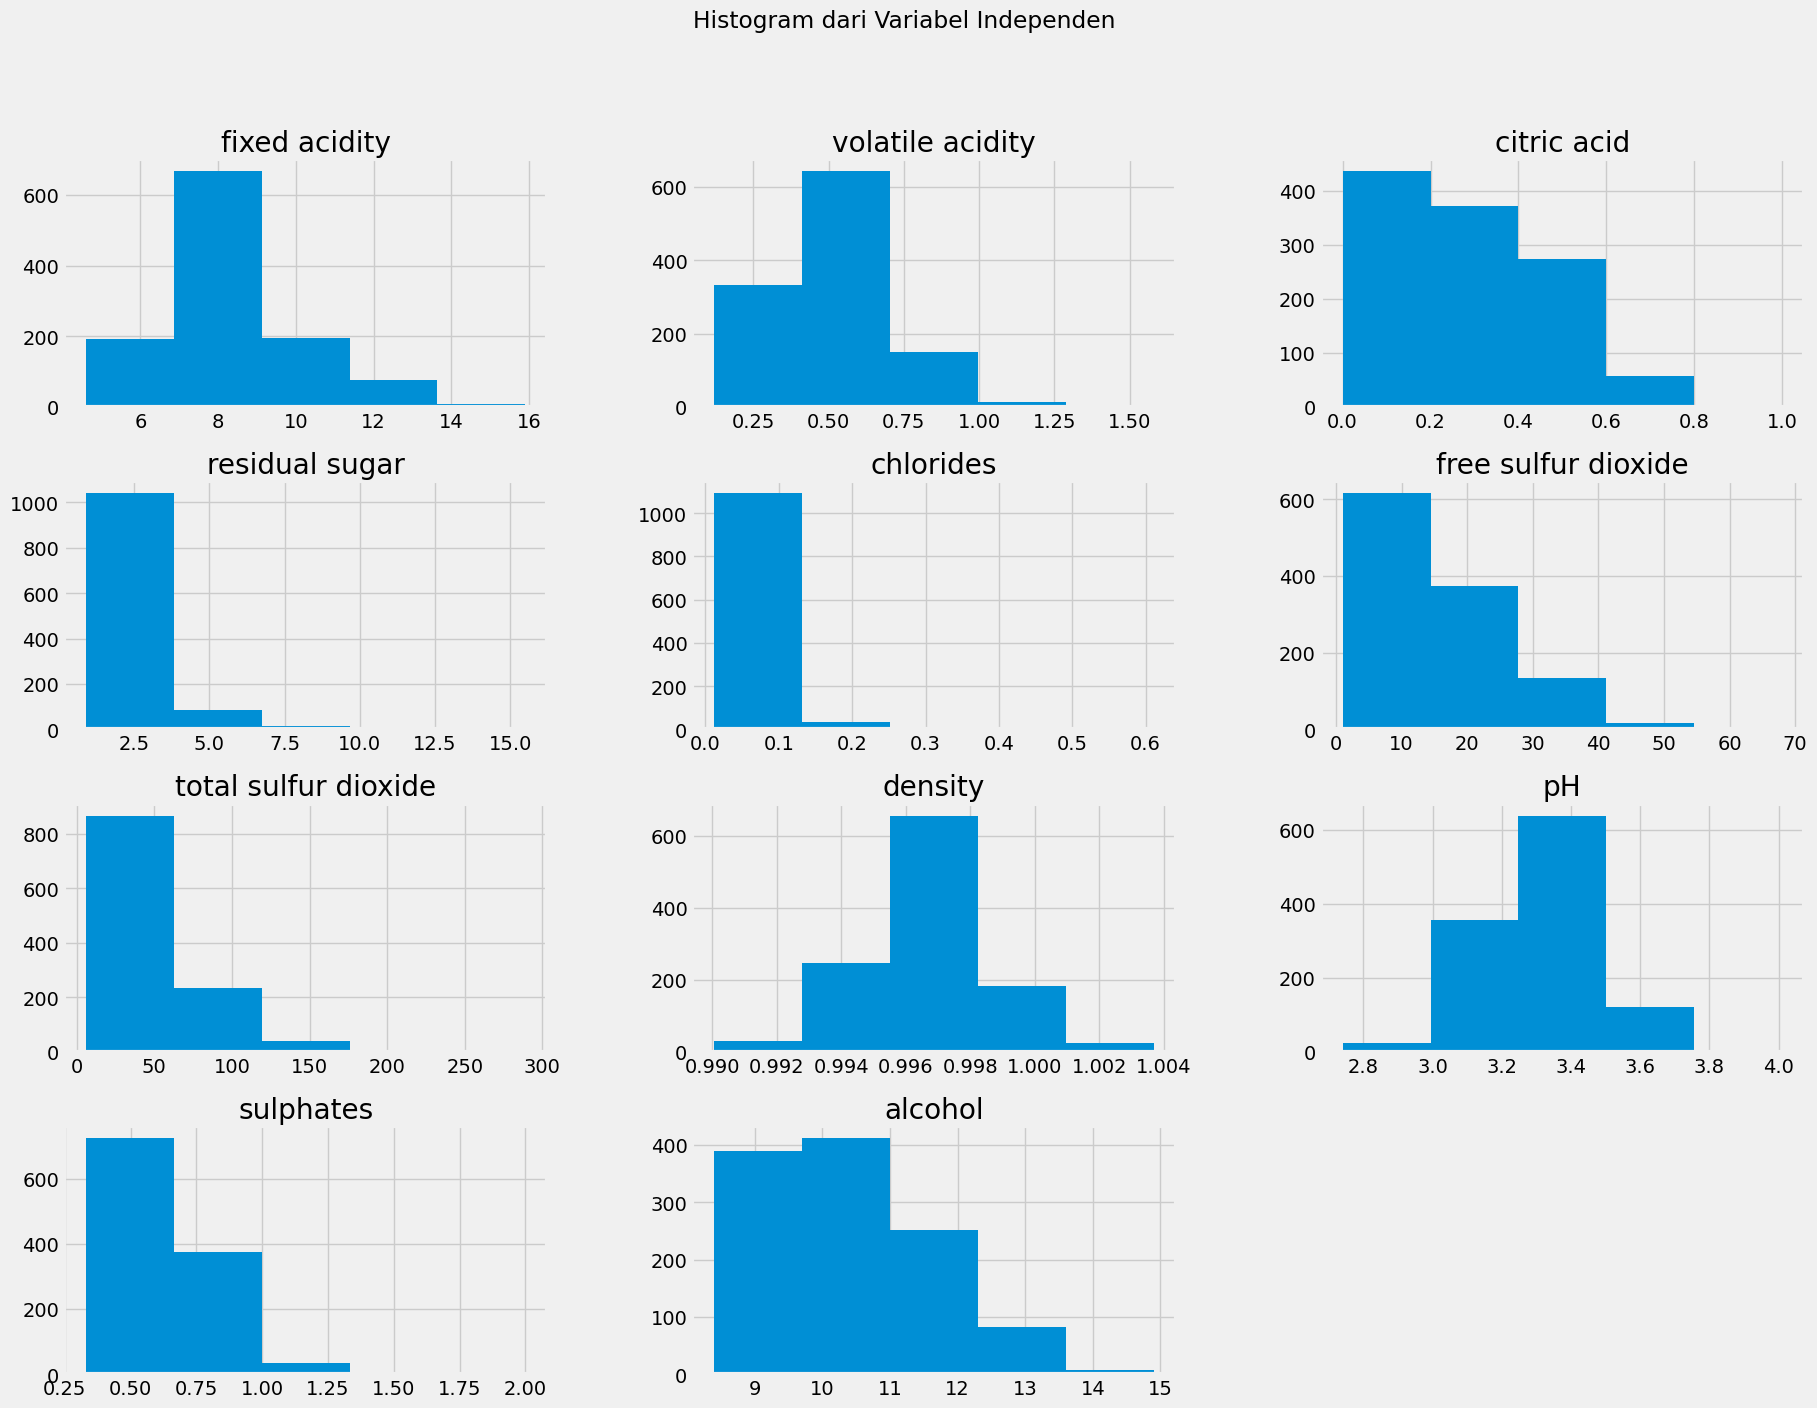

In [41]:
indep_vars.hist(bins=5, figsize=(20, 15), layout=(4, 3))
plt.suptitle('Histogram dari Variabel Independen')
plt.show()

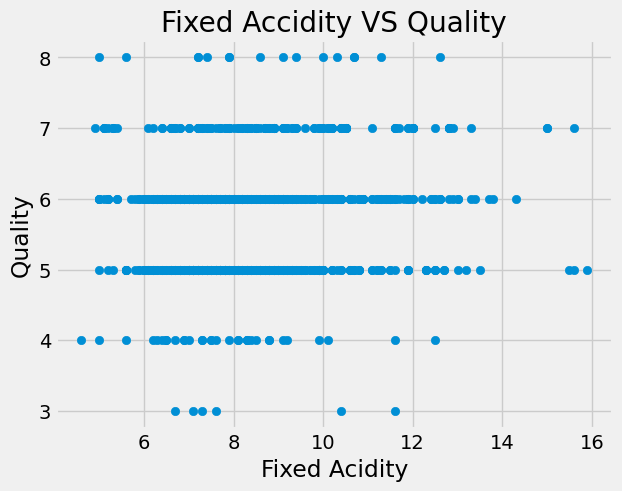

In [42]:
# Untuk Memmunculkan Scatter Plot Fixed Accidity VS Quality
plt.scatter(df['fixed acidity'], df['quality'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.title('Fixed Accidity VS Quality')
plt.show()

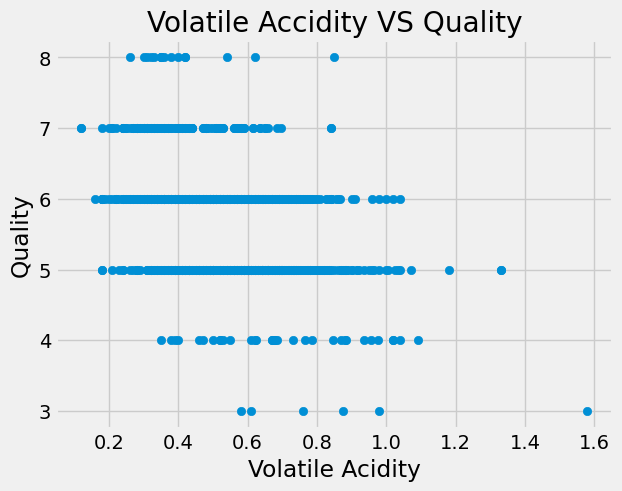

In [43]:
# Untuk Memmunculkan Scatter Plot Volatile Accidity VS Quality
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('Volatile Accidity VS Quality')
plt.show()

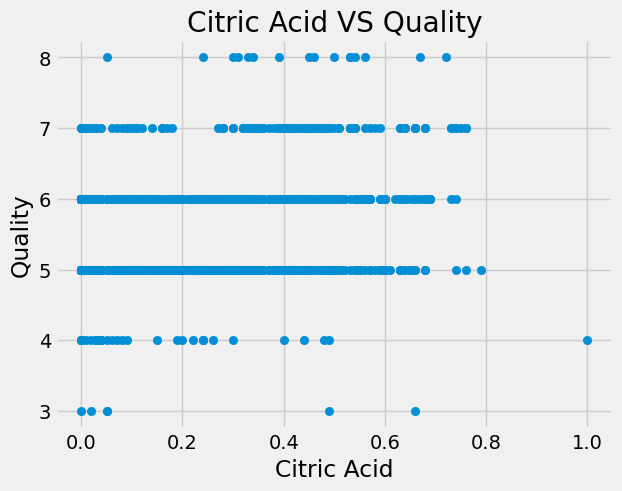

In [44]:
# Untuk Memmunculkan Scatter Plot Citric Acid VS Quality
plt.scatter(df['citric acid'], df['quality'])
plt.xlabel('Citric Acid')
plt.ylabel('Quality')
plt.title('Citric Acid VS Quality')
plt.show()

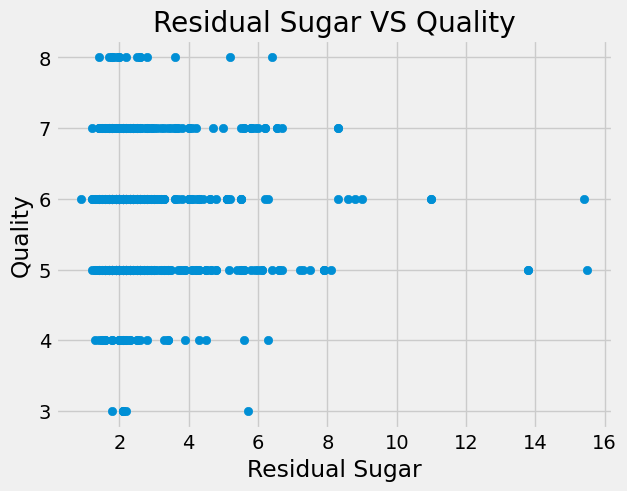

In [45]:
# Untuk Memmunculkan Scatter Plot Residual Sugar VS Quality
plt.scatter(df['residual sugar'], df['quality'])
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.title('Residual Sugar VS Quality')
plt.show()

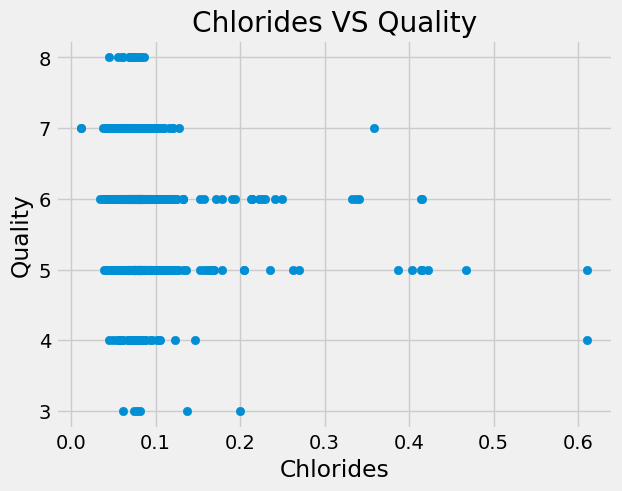

In [46]:
# Untuk Memmunculkan Scatter Plot Chlorides VS Quality
plt.scatter(df['chlorides'], df['quality'])
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.title('Chlorides VS Quality')
plt.show()

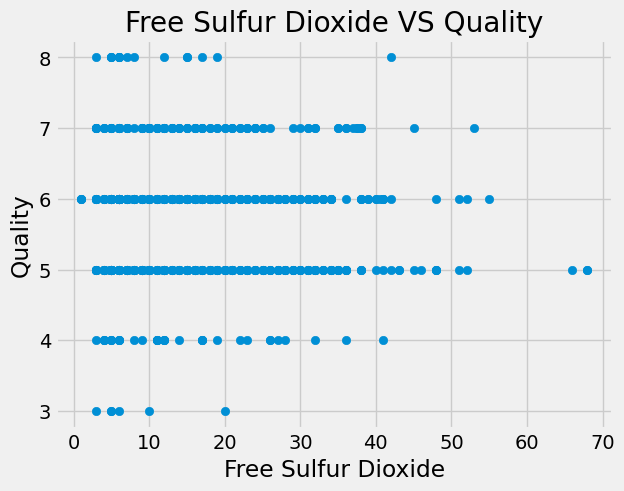

In [47]:
# Untuk Memmunculkan Scatter Plot Free Sulfur Dioxide	 VS Quality
plt.scatter(df['free sulfur dioxide'], df['quality'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')
plt.title('Free Sulfur Dioxide VS Quality')
plt.show()

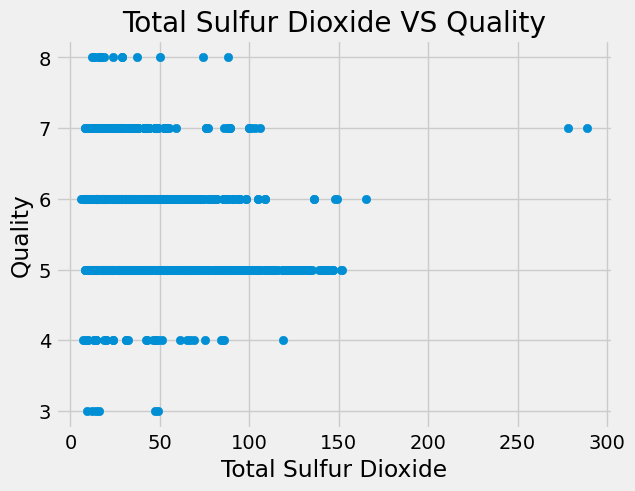

In [48]:
# Untuk Memmunculkan Scatter Plot Total Sulfur Dioxide VS Quality
plt.scatter(df['total sulfur dioxide'], df['quality'])
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Quality')
plt.title('Total Sulfur Dioxide VS Quality')
plt.show()

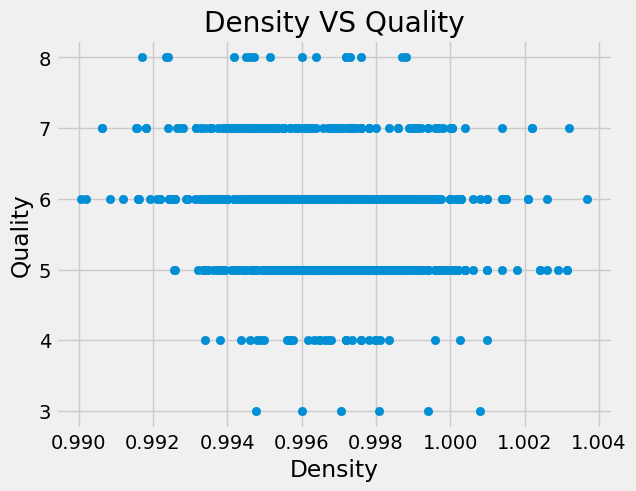

In [49]:
# Untuk Memmunculkan Scatter Plot Density VS Quality
plt.scatter(df['density'], df['quality'])
plt.xlabel('Density')
plt.ylabel('Quality')
plt.title('Density VS Quality')
plt.show()

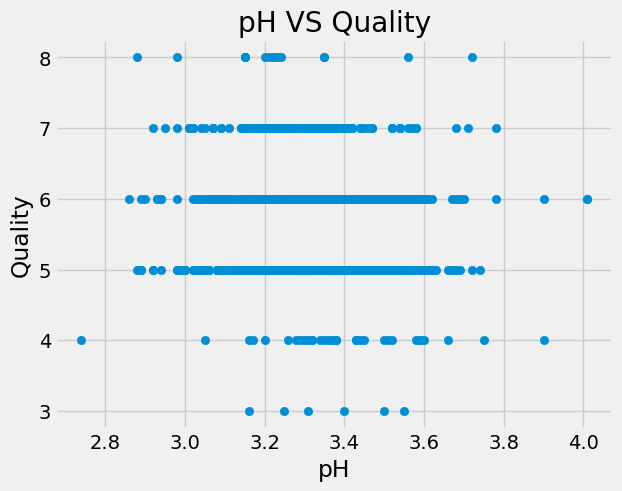

In [50]:
# Untuk Memmunculkan Scatter Plot pH VS Quality
plt.scatter(df['pH'], df['quality'])
plt.xlabel('pH')
plt.ylabel('Quality')
plt.title('pH VS Quality')
plt.show()

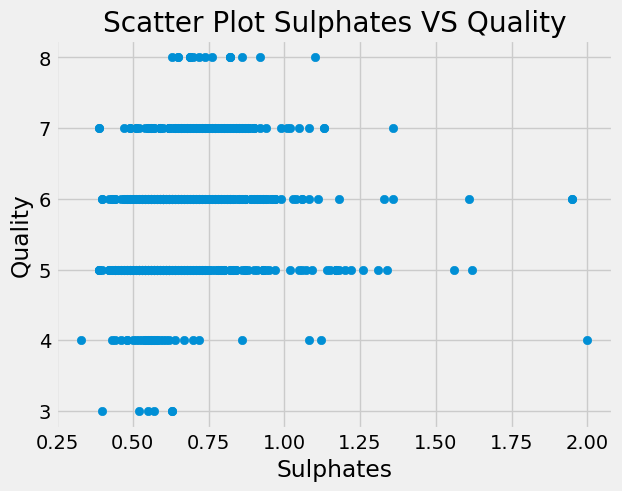

In [51]:
# Untuk Memmunculkan Scatter Plot Sulphates VS Quality
plt.scatter(df['sulphates'], df['quality'])
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.title('Scatter Plot Sulphates VS Quality')
plt.show()

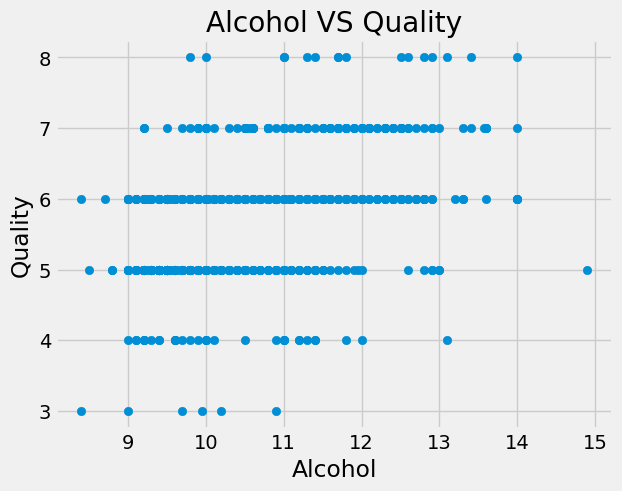

In [52]:
# Untuk Memmunculkan Scatter Plot Alcohol VS Quality
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol VS Quality')
plt.show()

# **Analisis Regresi Logistik Ordinal**

### **Membentuk Model Regresi Logistik Ordinal**

In [53]:
# Pastikan kolom kualitas diubah menjadi tipe kategorikal ordinal
df['quality'] = df['quality'].astype('category')

In [54]:
# Pisahkan variabel independen (X) dan variabel dependen (y)
X = df.drop(columns=['quality'])
y = df['quality']

In [55]:
# Buat Model Regresi Logistik Ordinal
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Lihat hasil estimasi parameter
print(result.summary())

# Ambil koefisien dan cut points
coefficients = result.params
betas = coefficients.iloc[:len(X.columns)]  # Koefisien variabel independen
cut_points = coefficients.iloc[len(X.columns):]  # Koefisien cut points

# Buat persamaan logit untuk setiap kualitas
print("\n=== Persamaan Model Regresi Logistik Ordinal ===")
for i, (cut_label, cut_value) in enumerate(cut_points.items()):
    eq = f"logit(P(Y ≤ {i+3})) = {cut_value:.4f}"  # Indeks kategori dimulai dari 3
    for var, beta in betas.items():
        eq += f" + ({beta:.4f})*{var}"
    print(eq)


Optimization terminated successfully.
         Current function value: 0.946804
         Iterations: 91
         Function evaluations: 94
         Gradient evaluations: 94
                             OrderedModel Results                             
Dep. Variable:                quality   Log-Likelihood:                -1082.2
Model:                   OrderedModel   AIC:                             2196.
Method:            Maximum Likelihood   BIC:                             2277.
Date:                Sun, 15 Dec 2024                                         
Time:                        05:13:18                                         
No. Observations:                1143                                         
Df Residuals:                    1127                                         
Df Model:                          11                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

Misalkan : fixed acidity = 7.9, volatile acidity = 0.640, citric acid = 0.1, residual sugar = 2.0, chlorides = 0.076, free sulfur dioxide = 24.0, total sulfur dioxide = 35.0, density = 0.99600, pH = 3.27, sulphates = 0.67, alcohol = 11.0

### **Evaluasi Model**

In [66]:
# Ambil log-likelihood model penuh dan model null
ll_full = result.llf  # Log-likelihood dari model dengan variabel independen
ll_null = result.model.fit(method='bfgs', maxiter=0).llf  # Model tanpa variabel independen (null model)

# Hitung McFadden's R²
mcfadden_r2 = 1 - (ll_full / ll_null)
print(f"McFadden's R²: {mcfadden_r2}")


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
McFadden's R²: 0.29096147630504254


Hasil perhitungan menunjukkan sebesar 0,29 yang artinya model sudah terevaluasi dan terbentuk dengan baik

### **Studi Kasus**

In [62]:
import numpy as np

# Data variabel independen
x_values = {
    'fixed_acidity': 7.9,
    'volatile_acidity': 0.640,
    'citric_acid': 0.1,
    'residual_sugar': 2.0,
    'chlorides': 0.076,
    'free_sulfur_dioxide': 24.0,
    'total_sulfur_dioxide': 35.0,
    'density': 0.99600,
    'pH': 3.27,
    'sulphates': 0.67,
    'alcohol': 9.0
}

# Koefisien variabel independen
coefficients = {
    'fixed_acidity': 0.0584,
    'volatile_acidity': -3.7139,
    'citric_acid': -0.7149,
    'residual_sugar': 0.0446,
    'chlorides': -4.4950,
    'free_sulfur_dioxide': 0.0082,
    'total_sulfur_dioxide': -0.0098,
    'density': -2.1907,
    'pH': -1.1832,
    'sulphates': 2.7230,
    'alcohol': 0.9266
}

# Cut points (dari hasil model)
cut_points = {
    'P(Y ≤ 3)': -3.0846,
    'P(Y ≤ 4)': 0.6668,
    'P(Y ≤ 5)': 1.3511,
    'P(Y ≤ 6)': 1.0702,
    'P(Y ≤ 7)': 1.0451
}

# Fungsi untuk menghitung logit
def calculate_logit(x_values, coefficients, cut_point):
    logit = cut_point  # Start with the cut point
    for var, coef in coefficients.items():
        logit += coef * x_values[var]  # Sum beta * x
    return logit

# Fungsi sigmoid untuk menghitung probabilitas dari logit
def sigmoid(logit):
    return 1 / (1 + np.exp(-logit))

# Hitung nilai logit dan probabilitas kumulatif untuk setiap kategori
logit_results = {}
prob_cumulative = {}

for category, cut_point in cut_points.items():
    logit = calculate_logit(x_values, coefficients, cut_point)
    prob = sigmoid(logit)
    logit_results[category] = logit
    prob_cumulative[category] = prob

# Hitung probabilitas setiap kategori Y (bukan kumulatif)
# P(Y = k) = P(Y ≤ k) - P(Y ≤ k-1)
categories = ['P(Y ≤ 3)', 'P(Y ≤ 4)', 'P(Y ≤ 5)', 'P(Y ≤ 6)', 'P(Y ≤ 7)']
prob_individual = {}

previous_prob = 0
for i, category in enumerate(categories):
    prob_individual[f'P(Y = {i + 3})'] = prob_cumulative[category] - previous_prob
    previous_prob = prob_cumulative[category]

# Kategori 8 adalah sisa probabilitas
prob_individual['P(Y = 8)'] = 1 - prob_cumulative['P(Y ≤ 7)']

# Tentukan kategori dengan probabilitas terbesar
predicted_category = max(prob_individual, key=prob_individual.get)

# Tampilkan hasil
print ("Hasil Logit : \n", logit_results)
print ("\nHasil Probabilitas Kumulatif : \n", prob_cumulative)
print ("\nHasil Probabilitas Individual : \n", prob_individual)
print ("\nKategori Terprediksi Pada :", predicted_category)


Hasil Logit : 
 {'P(Y ≤ 3)': -1.3574372000000015, 'P(Y ≤ 4)': 2.393962799999999, 'P(Y ≤ 5)': 3.078262799999999, 'P(Y ≤ 6)': 2.7973627999999984, 'P(Y ≤ 7)': 2.7722627999999983}

Hasil Probabilitas Kumulatif : 
 {'P(Y ≤ 3)': 0.20465714015623052, 'P(Y ≤ 4)': 0.9163657768096108, 'P(Y ≤ 5)': 0.955987148535654, 'P(Y ≤ 6)': 0.9425331483043392, 'P(Y ≤ 7)': 0.9411584238556266}

Hasil Probabilitas Individual : 
 {'P(Y = 3)': 0.20465714015623052, 'P(Y = 4)': 0.7117086366533804, 'P(Y = 5)': 0.039621371726043186, 'P(Y = 6)': -0.013454000231314822, 'P(Y = 7)': -0.001374724448712561, 'P(Y = 8)': 0.05884157614437335}

Kategori Terprediksi Pada : P(Y = 4)


# **Uji Hipotesis**

### **Uji Wald (Uji Z)**



*   H₀: Koefisien β = 0 (variabel independen tidak berpengaruh secara signifikan terhadap variabel dependen).
*   H₁: Koefisien β ≠ 0 (variabel independen berpengaruh secara signifikan terhadap variabel dependen).



In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import norm  # Gunakan distribusi normal dari scipy

# Uji Wald (z-statistik dan p-value)
# Ambil nilai koefisien dan standar error
coefficients = result.params  # Koefisien parameter
standard_errors = result.bse  # Standar error dari parameter

# Hitung nilai z dan p-value
wald_z = coefficients / standard_errors  # Statistik z
p_values = 2 * (1 - norm.cdf(np.abs(wald_z)))  # p-value dua sisi, menggunakan norm dari scipy

# Tampilkan hasil
wald_test_results = pd.DataFrame({
    'Koefisien': coefficients,
    'Std. Error': standard_errors,
    'z-statistik': wald_z,
    'p-value': p_values,
    'Keputusan': ['Signifikan' if p < 0.05 else 'Tidak Signifikan' for p in p_values]
})

print("\n=== Hasil Uji Wald (Uji z) ===")
print(wald_test_results)



=== Hasil Uji Wald (Uji z) ===
                           Koefisien    Std. Error  z-statistik       p-value  \
const                   -6013.346453  36326.076406    -0.165538  8.685205e-01   
fixed acidity               3.641762      1.395180     2.610245  9.047737e-03   
volatile acidity           -3.665768      1.210926    -3.027245  2.467939e-03   
citric acid                -1.426785      0.873601    -1.633223  1.024221e-01   
residual sugar             -0.488798      0.451942    -1.081551  2.794521e-01   
chlorides                  -2.424277      3.487287    -0.695175  4.869453e-01   
free sulfur dioxide         0.342633      0.111883     3.062413  2.195605e-03   
total sulfur dioxide       -0.031484      0.036843    -0.854535  3.928086e-01   
density                  5988.820678  36327.910954     0.164855  8.690585e-01   
pH                        -13.119298     32.493877    -0.403747  6.863989e-01   
sulphates                   9.853621      1.747418     5.638960  1.710804e-08

### **Uji Likelihood Ratio (Uji G)**



*   H0 (Hipotesis nol): Model sederhana cukup baik (tidak perlu menambahkan parameter/variabel).
*   H1 (Hipotesis alternatif): Model yang lebih kompleks secara signifikan lebih baik dari model sederhana.


Apakah semua variabel prediktor yang dimasukkan ke dalam model secara bersama-sama memberikan kontribusi yang signifikan dalam menjelaskan variabilitas variabel respon?

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from scipy.stats import chi2

# **Bangun model sederhana** (menggunakan 3 variabel saja, misalnya fixed acidity, volatile acidity, citric acid)
X_simple = X[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates']]  # Model sederhana hanya pakai 3 variabel
model_simple = OrderedModel(y, X_simple, distr='logit')
result_simple = model_simple.fit(method='bfgs')

# **Bangun model kompleks** (menggunakan semua variabel)
X_complex = X[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
               'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
model_complex = OrderedModel(y, X_complex, distr='logit')
result_complex = model_complex.fit(method='bfgs')

# **Ambil log-likelihood dari kedua model**
log_likelihood_simple = result_simple.llf  # Log-likelihood model sederhana
log_likelihood_complex = result_complex.llf  # Log-likelihood model kompleks

# **Hitung G-statistik dan p-value**
G_statistic = -2 * (log_likelihood_simple - log_likelihood_complex)
df = len(result_complex.params) - len(result_simple.params)  # Derajat kebebasan (df)
p_value = 1 - chi2.cdf(G_statistic, df)

# **Tampilkan hasil**
print("Log-Likelihood Model Sederhana:", log_likelihood_simple)
print("Log-Likelihood Model Kompleks :", log_likelihood_complex)
print("G-statistik:", G_statistic)
print("Derajat Kebebasan (df):", df)
print(f"p-value: {p_value:.10e}")

if p_value < 0.05:
    print("H0 ditolak artinya model kompleks lebih baik.")
else:
    print("H0 gagal ditolak artinya model sederhana lebih baik.")


Optimization terminated successfully.
         Current function value: 0.577857
         Iterations: 44
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 0.509390
         Iterations: 78
         Function evaluations: 81
         Gradient evaluations: 81
Log-Likelihood Model Sederhana: -660.4901443378367
Log-Likelihood Model Kompleks : -582.2333168783767
G-statistik: 156.51365491891988
Derajat Kebebasan (df): 7
p-value: 0.0000000000e+00
H0 ditolak artinya model kompleks lebih baik.


# **Uji Asumsi Klasik Regresi**

### **Uji Multikolinearitas (Variance Inflation Factors / VIF)**

In [60]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Misalnya X adalah DataFrame yang berisi variabel independen
# Jika belum, tambahkan konstanta (intercept) terlebih dahulu
X_with_const = add_constant(X)

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Menampilkan hasil VIF
print(vif_data)


                Variable           VIF
0                  const  1.709667e+06
1          fixed acidity  7.780540e+00
2       volatile acidity  1.778704e+00
3            citric acid  3.222840e+00
4         residual sugar  1.743237e+00
5              chlorides  1.538470e+00
6    free sulfur dioxide  1.906045e+00
7   total sulfur dioxide  2.103748e+00
8                density  6.595115e+00
9                     pH  3.393307e+00
10             sulphates  1.440741e+00
11               alcohol  3.184642e+00


*   Sebagian besar variabel dalam model memiliki VIF di bawah 5, yang berarti tidak ada masalah multikolinearitas yang signifikan.
*   Variabel fixed acidity dan density memiliki VIF lebih tinggi dibandingkan variabel lainnya, tetapi keduanya masih dalam batas yang dapat diterima (di bawah 10), jadi tidak perlu dihapus atau dimodifikasi kecuali ada alasan lain yang kuat.
*   Secara keseluruhan, multikolinearitas dalam model ini tidak tampak menjadi masalah besar, meskipun tetap perlu memantau variabel dengan VIF lebih tinggi.





### **Uji Linearitas Dalam Logit**

In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import pandas as pd

# Pastikan Anda membaca dataset dengan benar
df = pd.read_csv('/content/WineQT.csv')  # Sesuaikan path file CSV Anda  # Lihat 5 baris pertama dari dataset

# Definisikan variabel independen (X) dan dependen (y)
# Asumsikan kita menggunakan kualitas wine sebagai variabel dependen y (ordinal yang diubah menjadi binary di sini)
y = (df['quality'] > 5).astype(int)  # Contoh: mengubah kualitas menjadi binary (1 jika kualitas > 5, 0 jika tidak)
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]  # Pilih 4 variabel prediktor

# Tambahkan kolom X*ln(X) ke dataset
for col in X.columns:
    X[f'{col}_ln'] = X[col] * np.log(X[col].replace(0, 1e-10))  # Hindari log(0) dengan mengganti 0 menjadi nilai kecil (1e-10)

# Gabungkan variabel asli dengan interaksi log-nya
X = sm.add_constant(X)  # Tambahkan intercept (konstanta)

# Bangun model logistik dengan Statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Tampilkan ringkasan hasil
print(result.summary())


         Current function value: 0.491468
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1143
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                           22
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.2871
Time:                        05:15:14   Log-Likelihood:                -561.75
converged:                      False   LL-Null:                       -787.97
Covariance Type:            nonrobust   LLR p-value:                 5.706e-82
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6013.3465   3.63e+04     -0.166      0.869   -7.72e+04    6.52e+04
fixed acidity             